# Exploratory Data Analysis

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly
import plotly.offline as py
import plotly.graph_objs as go
!pip install missingno
import missingno as msno

In [2]:
#Loading the original dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Dataset description:
	
Pima Indian Diabetes (PID) dataset is used in the present project & is available on all three repositories UCI, Data World, and Kaggle. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets consists of 768 rows and 9 columns & several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
    
*Pregnancies*: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)


In [3]:
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


* the present dataset contains 8 predictor variables and one target variable, 'Outcome'.
* The predictor variables are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction & Age.
* initial glance at dataset shows that there are some zeros in "BloodPressure","SkinThickness","Insulin", "BMI" which are quite impossible
* Further we see that all columns contain numerical variables except “Outcome” variable which is categorical and ‘0’ indicates person is non-diabetic and ‘1’ indicates person is diabetic.

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It seems that there are no null values in the dataset. But from initial glance at dataset shows that there are some zeros in "BloodPressure","SkinThickness","Insulin", "BMI" which are quite impossible. So we have null values or missing values in disguised form.

## descriptive statistics of numerical variables


In [5]:
diabetes_df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T
# Glucose, BloodPressure, SkinThickness, Insulin, BMI have invalid zero values


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


- In all predictor variables, we see that there is significant difference between max value and 75% which indicates the presence of outliers in the dataset.

- Further from statistical analysis of above table, we see that minimum value of Glucose, Blood pressure, skin thickness, insulin, & bmi are zero which is not possible. So we can infer that there are some hidden missing values in the given dataset.

- As there are hidden missing values in the current dataset, we will replace zeros in the it shows that there are not missing values in the current dataset. but from EDA, we found that there were several zeros (which are impossible in Glucose, Bloodpressure, SkinThickness, Insulin & BMI columns so we will replace these zeros by nan and then will visualize the nan values in each column and replace by suitable methods.


## Visualization of dataset:

In [6]:
#visualisation of data for better understanding of distribution of 'Outcome' which will show us how many person in the dataset are diabetic (1) or non-diabetic(0)
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Text(0.5, 1.0, 'Count Plot for Outcome')

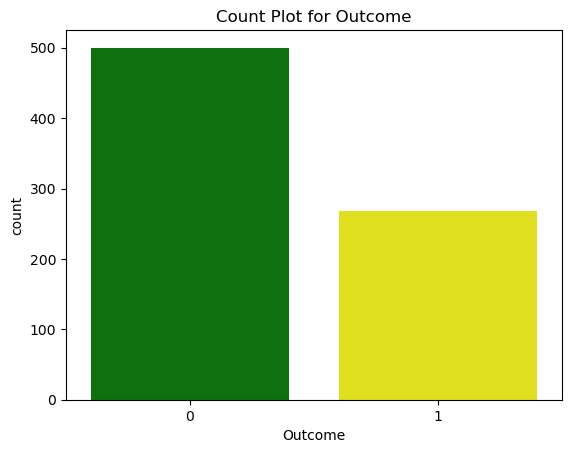

In [7]:
#plotting the distribution of outcome
sns.countplot(x='Outcome', data=diabetes_df, palette = ["green", "yellow"])
plt.title('Count Plot for Outcome')



* it shows class imbalanced because it contains more 'non-diabetic' persons i.e., 500 in comparison to 'diabetic' persons i.e., 268

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1735350581.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1735350581.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/

Text(0.5, 1.0, 'Boxplot for Number of pregnancies by Outcome')

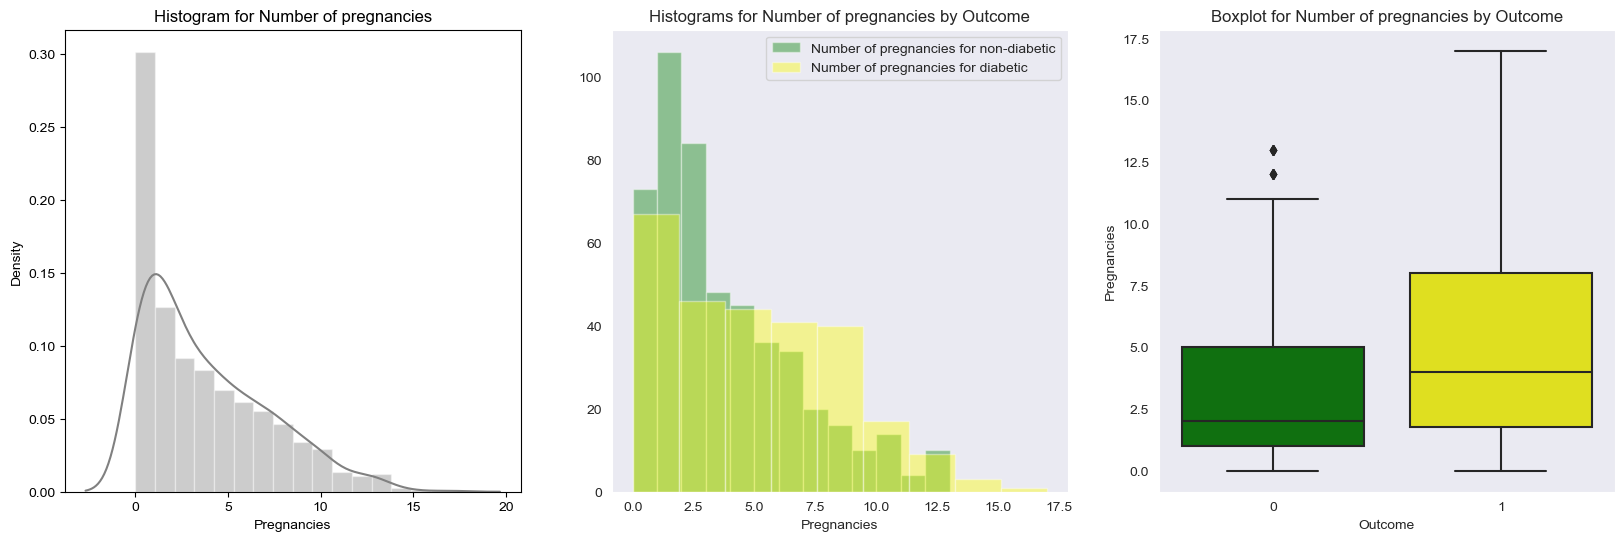

In [8]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
dia0 = diabetes_df[diabetes_df.Outcome==0]
dia1=diabetes_df[diabetes_df.Outcome==1]
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Number of pregnancies")
sns.distplot(diabetes_df.Pregnancies, color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Pregnancies,kde=False,color="green", label="Number of pregnancies for non-diabetic")
sns.distplot(dia1.Pregnancies,kde=False,color = "yellow", label = "Number of pregnancies for diabetic")
plt.title("Histograms for Number of pregnancies by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Pregnancies,palette = ["green", "yellow"])
plt.title("Boxplot for Number of pregnancies by Outcome")


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/988682625.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/988682625.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/988

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

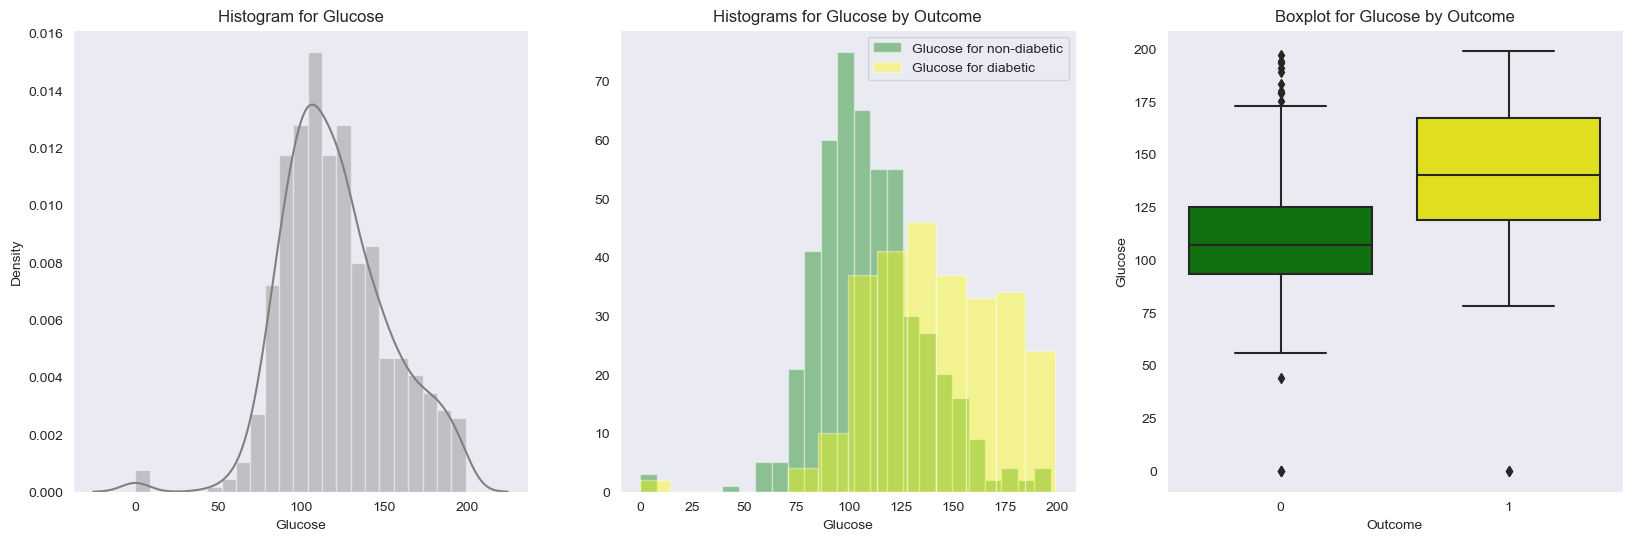

In [9]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Glucose")
sns.distplot(diabetes_df.Glucose,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Glucose,kde=False,color="green", label="Glucose for non-diabetic")
sns.distplot(dia1.Glucose,kde=False,color = "yellow", label = "Glucose for diabetic")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Glucose,palette = ["green", "yellow"])
plt.title("Boxplot for Glucose by Outcome")

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/4100677308.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/4100677308.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/4

Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome')

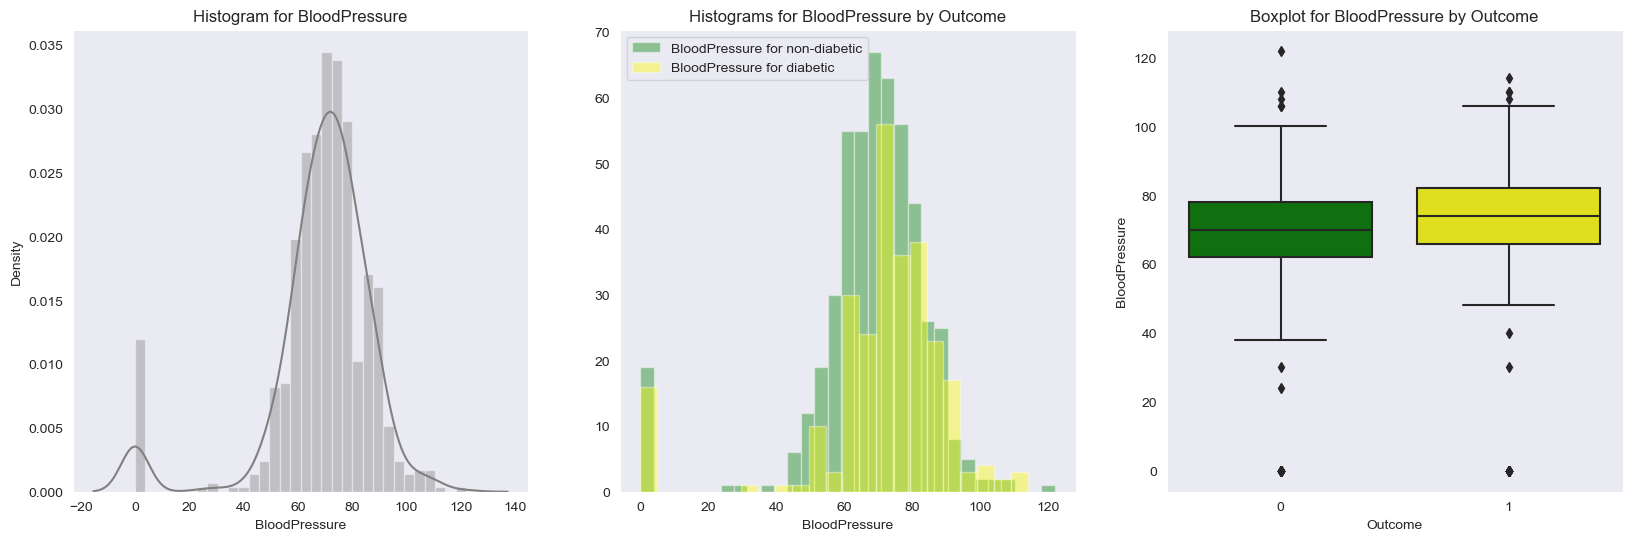

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BloodPressure")
sns.distplot(diabetes_df.BloodPressure,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.BloodPressure,kde=False,color="green", label="BloodPressure for non-diabetic")
sns.distplot(dia1.BloodPressure,kde=False,color = "yellow", label = "BloodPressure for diabetic")
plt.title("Histograms for BloodPressure by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.BloodPressure,palette = ["green", "yellow"])
plt.title("Boxplot for BloodPressure by Outcome")

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1818190037.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1818190037.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1

Text(0.5, 1.0, 'Boxplot for SkinThickness by Outcome')

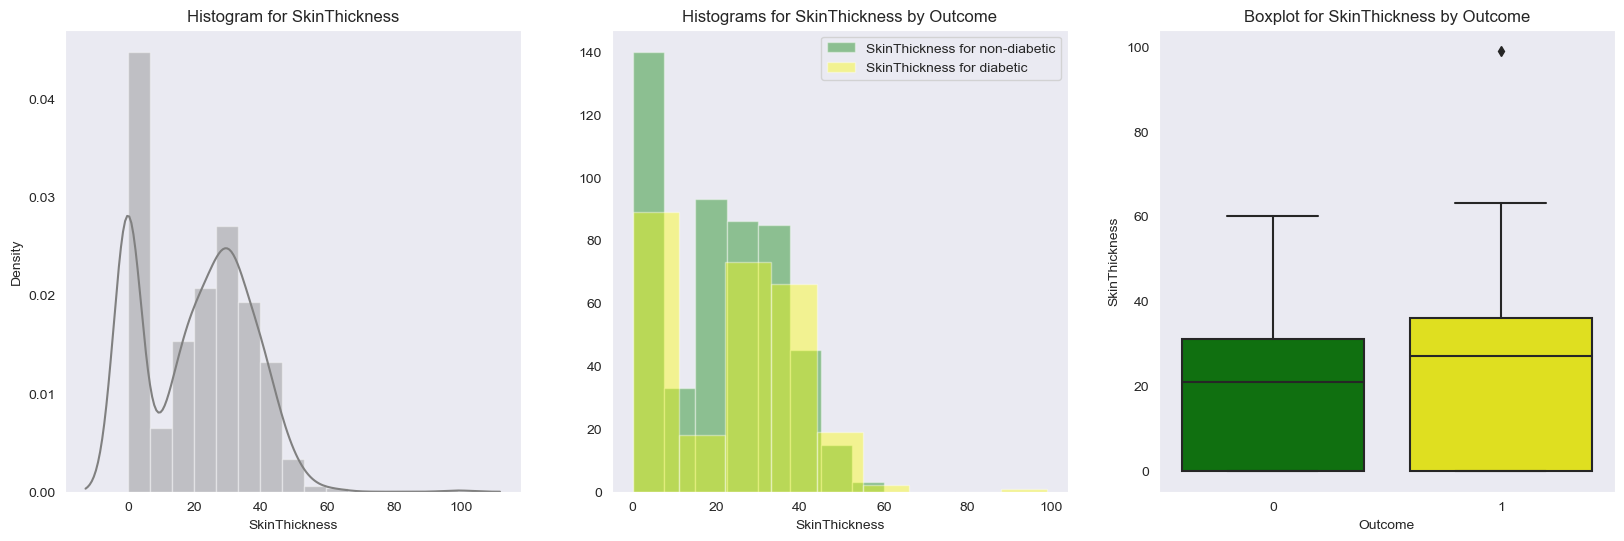

In [11]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for SkinThickness")
sns.distplot(diabetes_df.SkinThickness,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.SkinThickness,kde=False,color="green", label="SkinThickness for non-diabetic")
sns.distplot(dia1.SkinThickness,kde=False,color = "yellow", label = "SkinThickness for diabetic")
plt.title("Histograms for SkinThickness by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.SkinThickness,palette = ["green", "yellow"])
plt.title("Boxplot for SkinThickness by Outcome")

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/3623872997.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/3623872997.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/3

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

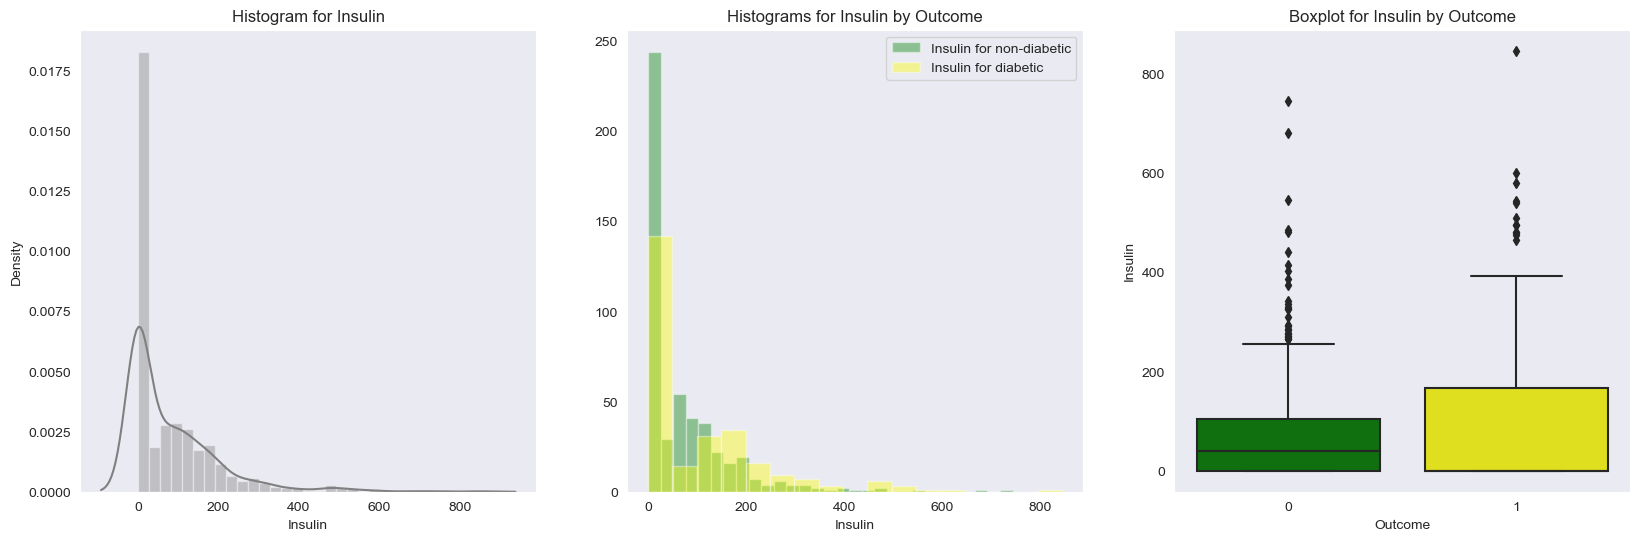

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Insulin")
sns.distplot(diabetes_df.Insulin,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Insulin,kde=False,color="green", label="Insulin for non-diabetic")
sns.distplot(dia1.Insulin,kde=False,color = "yellow", label = "Insulin for diabetic")
plt.title("Histograms for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Insulin,palette = ["green", "yellow"])
plt.title("Boxplot for Insulin by Outcome")

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1486949891.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1486949891.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1

Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

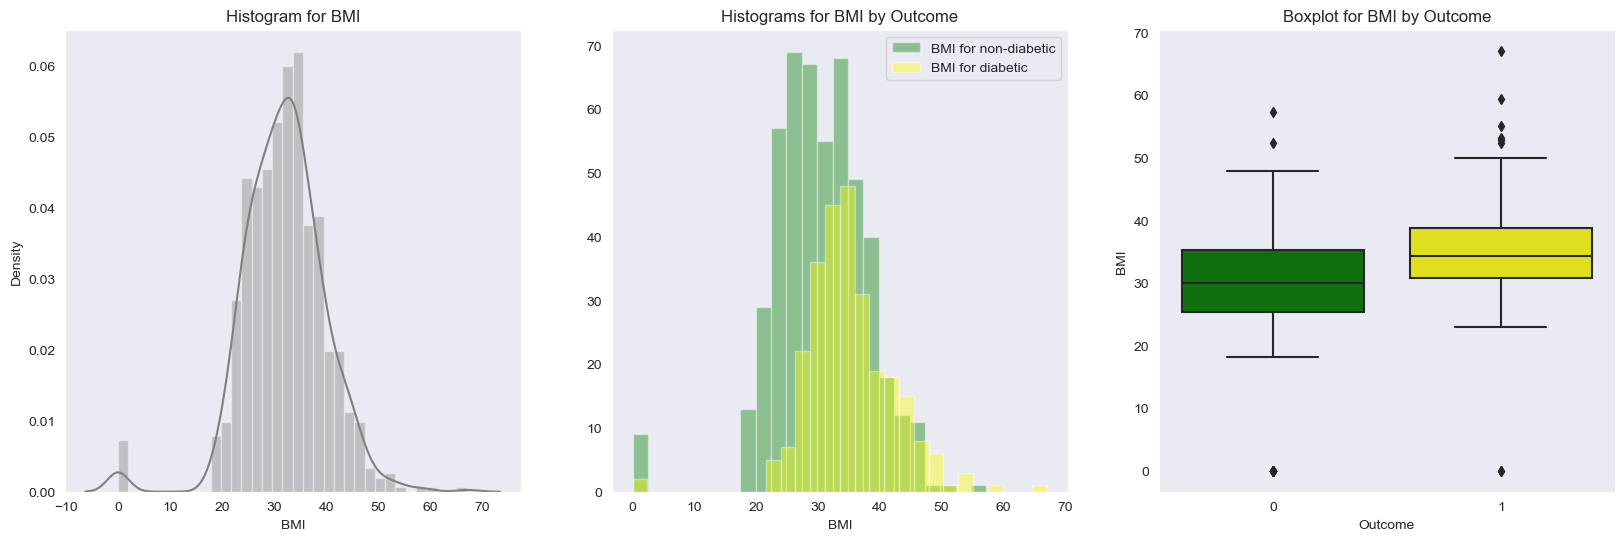

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BMI")
sns.distplot(diabetes_df.BMI,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.BMI,kde=False,color="green", label="BMI for non-diabetic")
sns.distplot(dia1.BMI,kde=False,color = "yellow", label = "BMI for diabetic")
plt.title("Histograms for BMI by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.BMI,palette = ["green", "yellow"])
plt.title("Boxplot for BMI by Outcome")

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/872392660.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/872392660.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/872

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

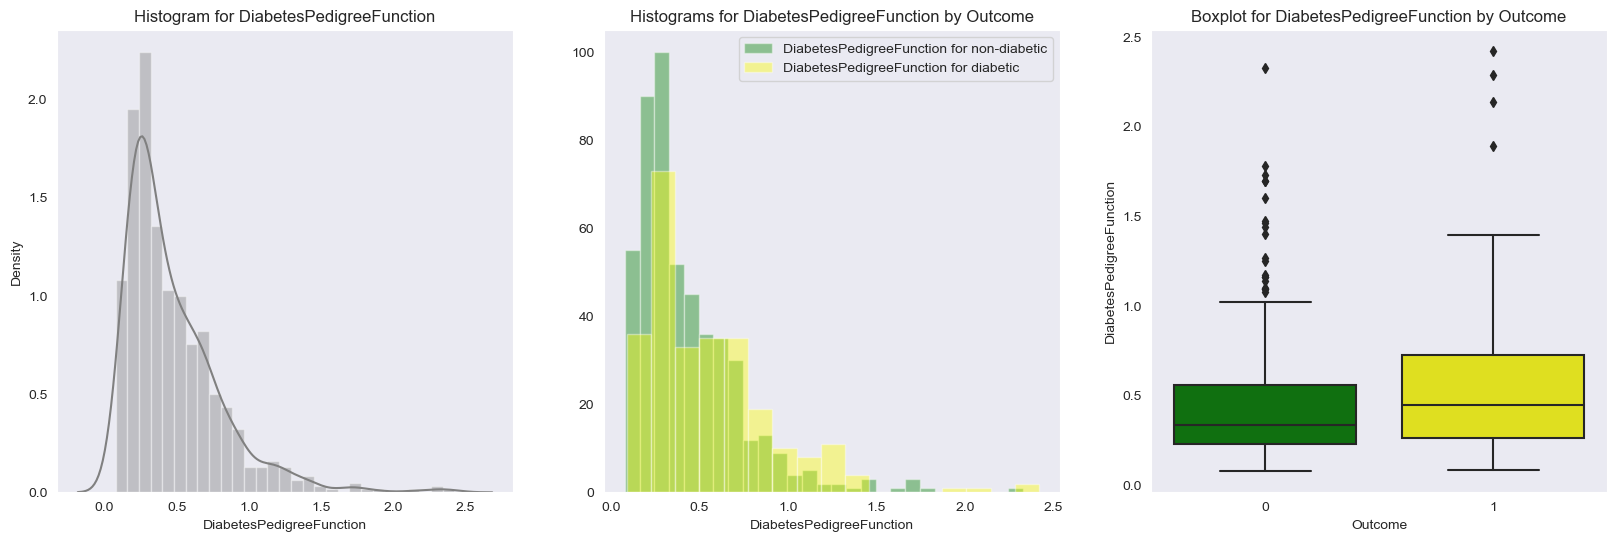

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for DiabetesPedigreeFunction")
sns.distplot(diabetes_df.DiabetesPedigreeFunction,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.DiabetesPedigreeFunction,kde=False,color="green", label="DiabetesPedigreeFunction for non-diabetic")
sns.distplot(dia1.DiabetesPedigreeFunction,kde=False,color = "yellow", label = "DiabetesPedigreeFunction for diabetic")
plt.title("Histograms for DiabetesPedigreeFunction by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.DiabetesPedigreeFunction,palette = ["green", "yellow"])
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1956967957.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1956967957.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/vz/c_q3cvxj2jd456rdrdnv_x3c0000gn/T/ipykernel_92536/1

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

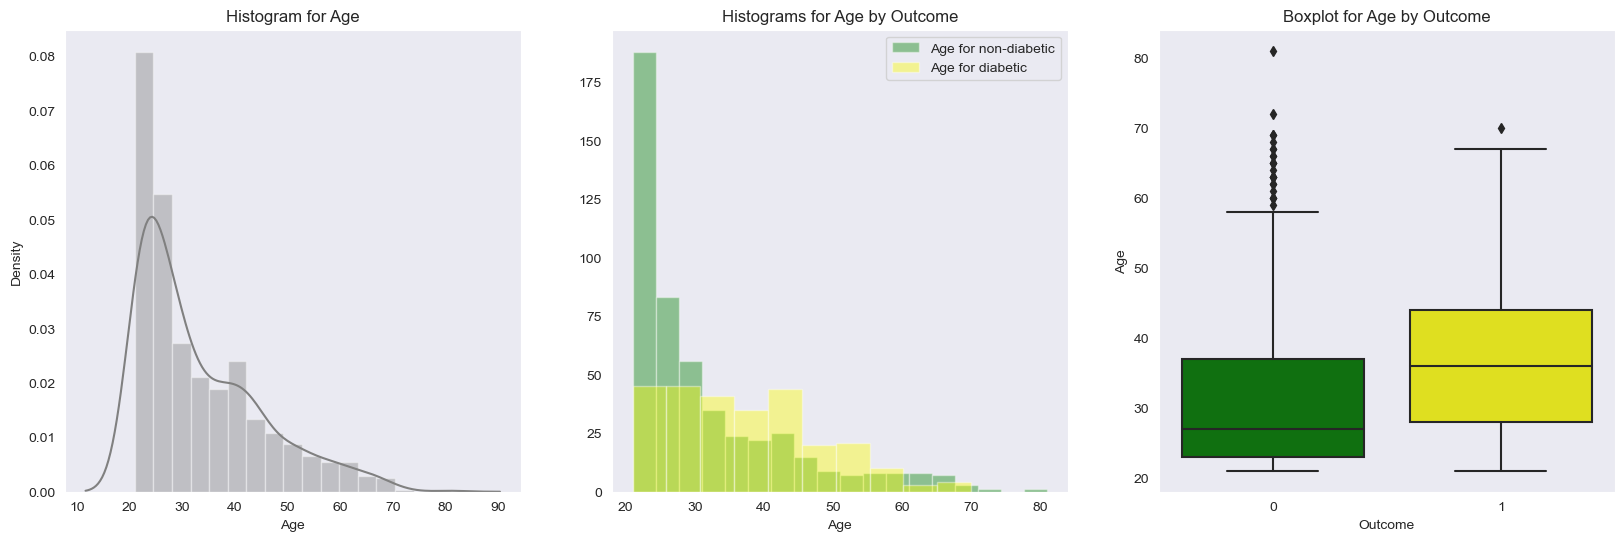

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.distplot(diabetes_df.Age,color = "grey", kde=True)
plt.subplot(1,3,2)
sns.distplot(dia0.Age,kde=False,color="green", label="Age for non-diabetic")
sns.distplot(dia1.Age,kde=False,color = "yellow", label = "Age for diabetic")
plt.title("Histograms for Age by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetes_df.Outcome,y=diabetes_df.Age,palette = ["green", "yellow"])
plt.title("Boxplot for Age by Outcome")

### Screening of Association between Variables to study Bivariate relationship 
* We will use pairplot to study the association between variables – from individual scatter plots Then we will summarize the same as heatmap



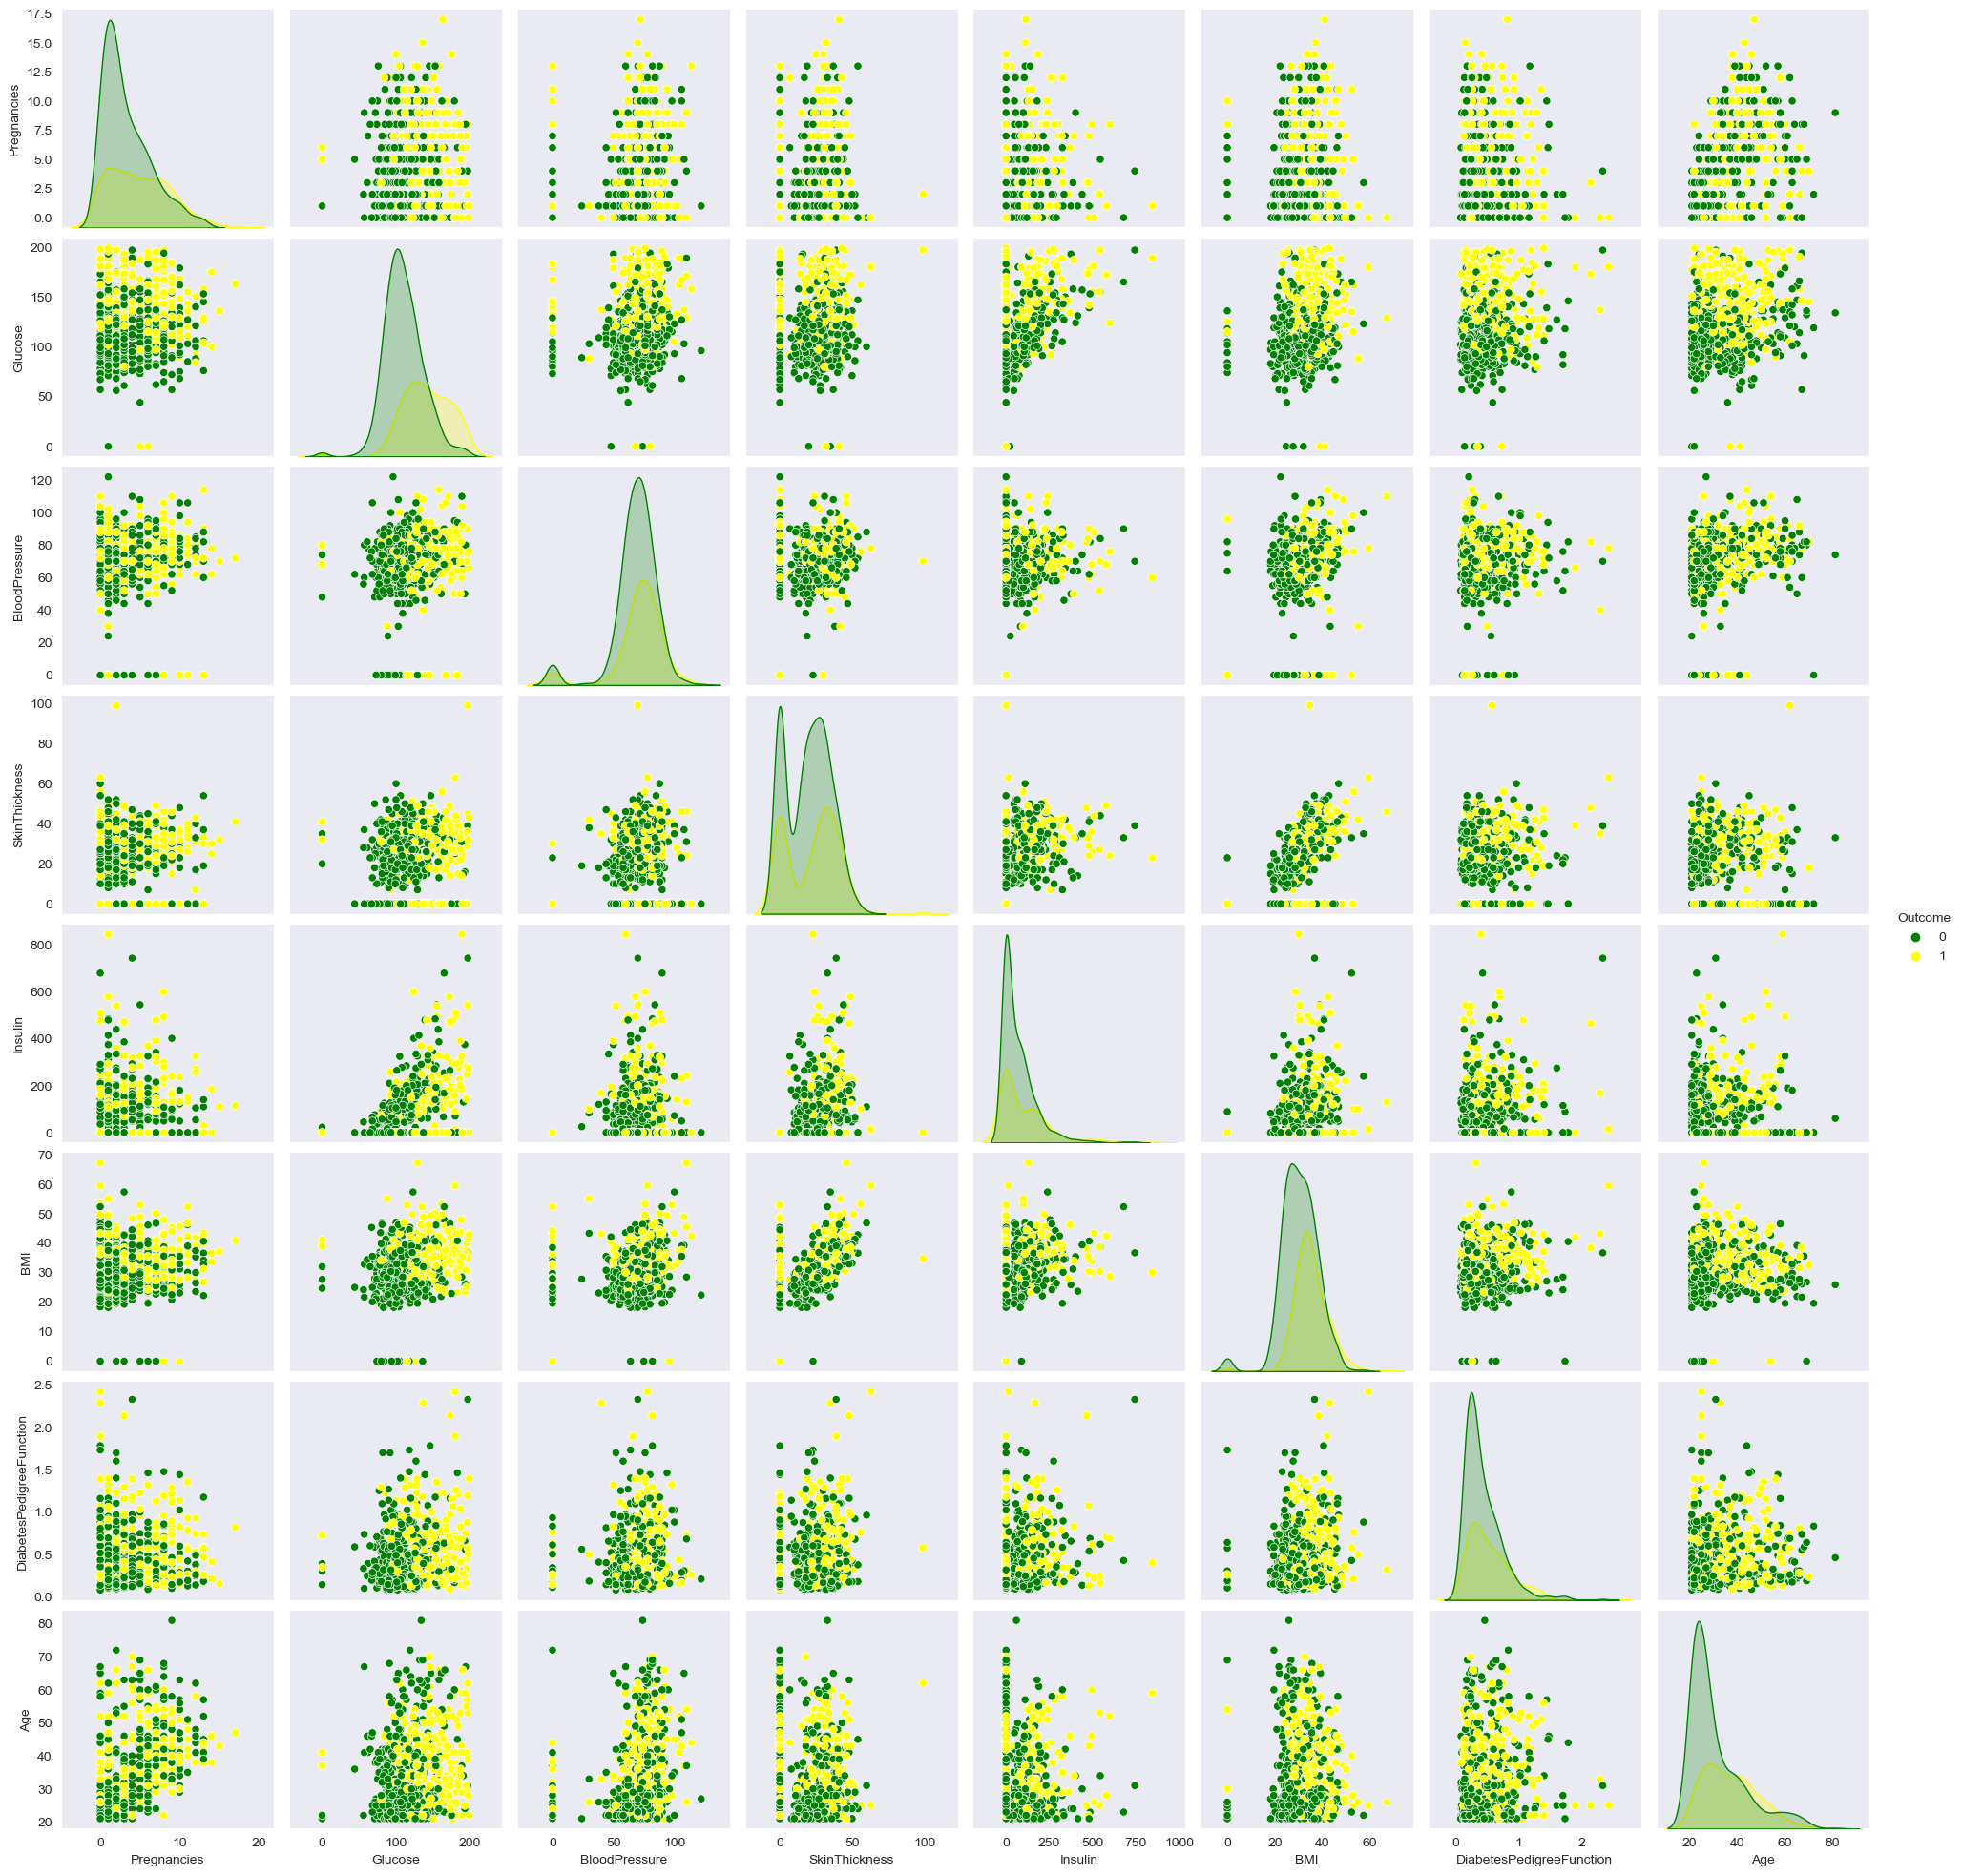

In [16]:
#pairplot allows us to visualize the distribution of single variables and relationship between two variables. The plots on diagonal helps us in seeing the distribution of single variable while the scatter plot on upper & lower triangles shows the relationship between two variables.
sns.pairplot(diabetes_df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome",palette = ["green", "yellow"])

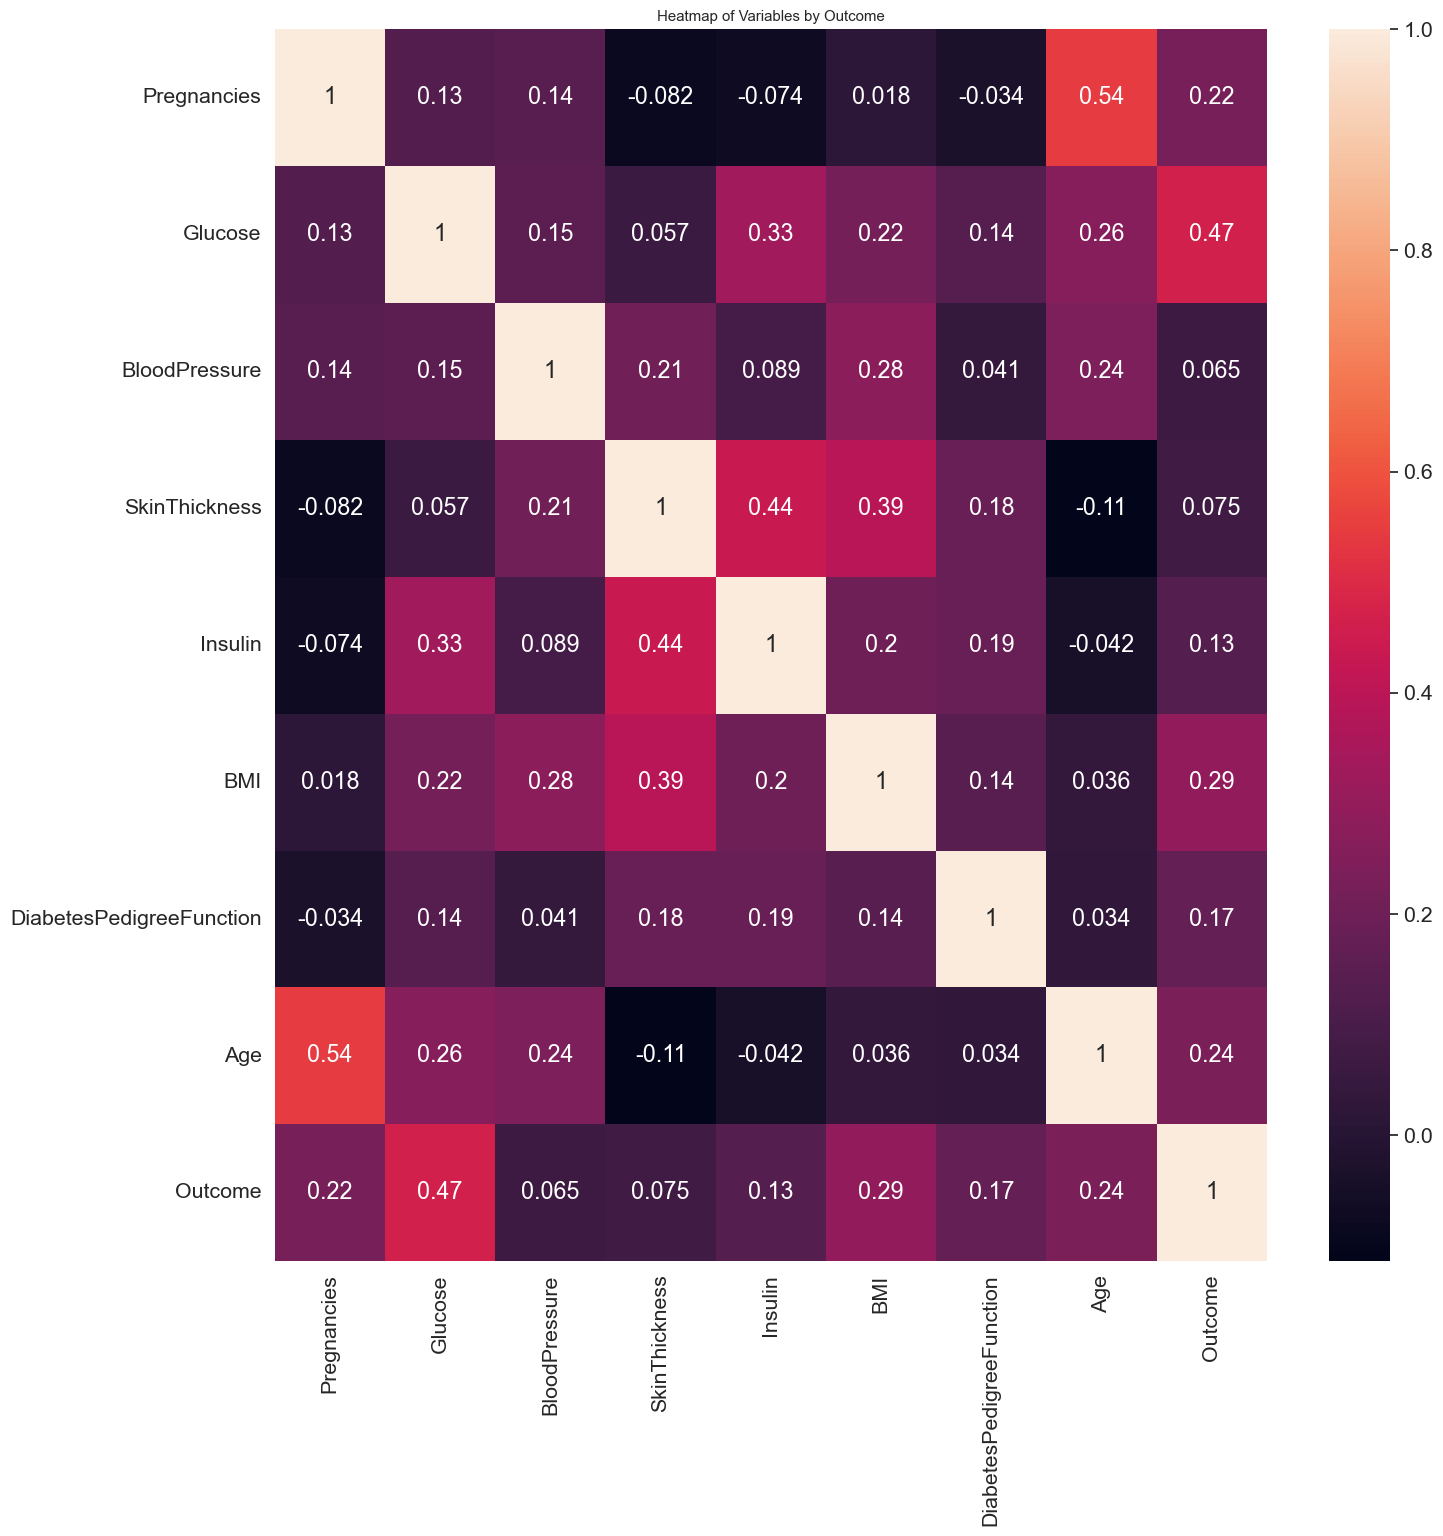

In [17]:
#Heatmap helps in finding correlation between set of variables and see which pairs are highly correlated.
sns.set(font_scale=1.4)
plt.figure(figsize = (16,16))
sns.heatmap(diabetes_df.corr(), annot=True, )
sns.set(font_scale=0.9)
plt.title("Heatmap of Variables by Outcome")
plt.savefig('Heatmap')

# Missing or Null Data points

In [18]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* but we see from the above graphs that this dataset contains missing values in disguised form, i.e., impossible zeros corresponding to various variables
* it shows that there are not missing values in the current dataset. but from EDA, we found that there were several zeros (which are impossible in Glucose, Bloodpressure,SkinThickness, Insulin & BMI columns so we will replace these zeros by nan and then will visualize the nan values in each column and replace by suitable methods.


In [19]:
## Mark invalid zero values as NaN (null)
temp_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']  
diabetes_df[temp_cols] = diabetes_df[temp_cols].replace(0, np.nan)
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Here we see that Glucose, BloodPressure, SkinThickness, Insulin & BMI have 5, 35, 227, 374 & 11 missing values respectively.


In [20]:
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [29]:
#saving the diabetes_df into csv format for further processing in separate notebooks
diabetes_df.to_csv('diabetes_df.csv', index = False)

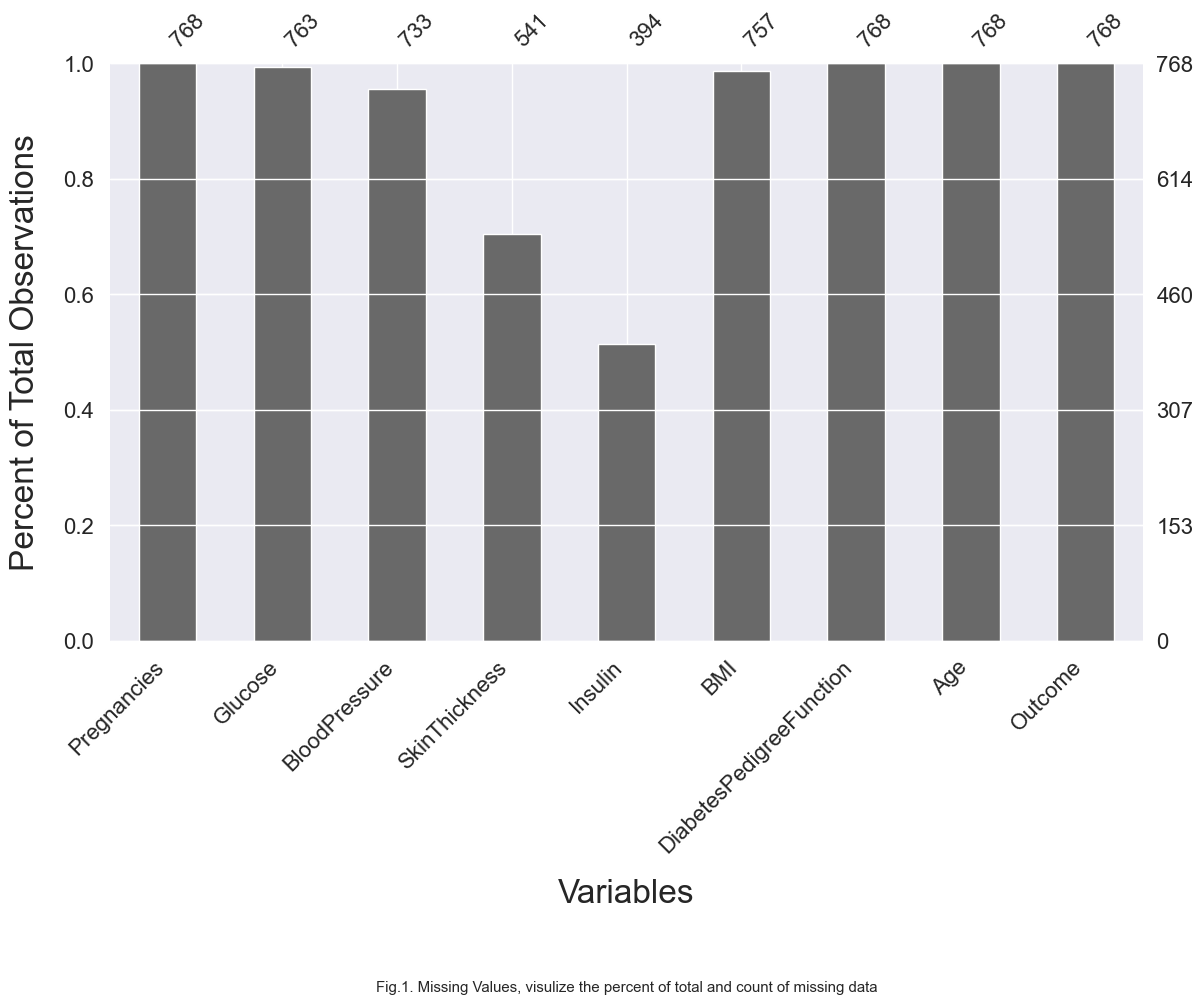

In [25]:
# Use Missingno python library to visualize null values
# Visualize the number of missing values as a bar chart

fig,ax = plt.subplots()
fig = msno.bar(diabetes_df, figsize=(13.33,7.5))

# Add labels
ax.set_xlabel('Variables', size=24, labelpad=16)
ax.set_ylabel('Percent of Total Observations', size=24, labelpad=16)
ax.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum = 1
figtxt = ". Missing Values, visulize the percent of total and count of missing data"
figcap = "Fig." + str(fignum) + figtxt
ax.text(0.5, -0.6, figcap, ha='center', va='center', transform=ax.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-bar-chart.png', bbox_inches='tight')

plt.show()

- From above figure, we can infer that Insulin column have approx. 50% of missing values followed by SkinThickness, around 30%. Although columns Glucose, BloodPressure, and BMI have missing values yet their number is quite less in comparison to Insulin & SkinThickness.

- The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion. The plot appears blank(white) wherever there are missing values. For instance, in the Glucose column there are only 5 instances of missing data, hence the 5 white lines. The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

- The Glucose column has very few missing values and does not seem to be correlated with any other column. As a result, the "missingness" in Glucose column can likely be attributed as missing completely at random. On the other hand, both the SkinThickness and Insulin columns have a lot of missing values. These columns might be case of missing at random, as we cannot directly observe the reason for "missingness" of data in thesecolumns.

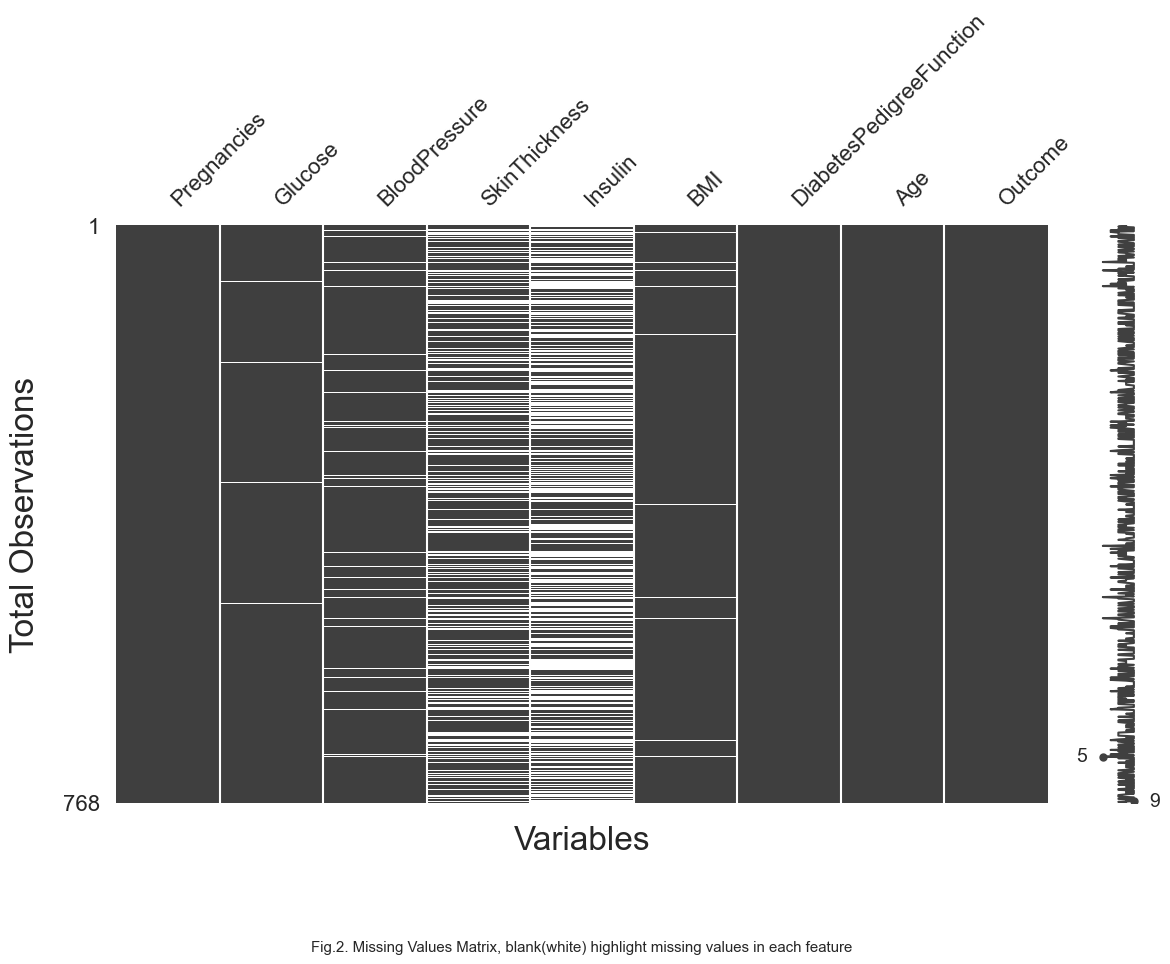

In [27]:
# Visualize the number of missing values as a matrix
fig = msno.matrix(diabetes_df, figsize=(13.33,7.5))

# Add labels
plt.xlabel('Variables', size=24, labelpad=16)
plt.ylabel('Total Observations', size=24, labelpad=16)
plt.tick_params(axis='both', labelsize=16, length=8)

# Add caption
fignum += 1
figtxt = ". Missing Values Matrix, blank(white) highlight missing values in each feature"
figcap = "Fig." + str(fignum) + figtxt
plt.text(0.5, -0.25,figcap, ha='center', va='center', transform=fig.transAxes)
plt.savefig('fig' + str(fignum) + '-missing-data-matrix.png', bbox_inches='tight')

plt.show()

- Again, it the above diagram shows that there are lots of missing values in the 'SkinThickness' & 'Insulin' column which are very important for the prediction of Outcome (whether person is diabetic or not

- Although, we are using PIMA Indian diabetes dataset, describe in previous section. But we infer from the overview of the dataset is that it contains many missing values so we will not proceed with his data for further model building and prediction purposes. Instead we will generate four datasets by using imputation & deletion techniques described in detail in next section.